In [1]:
%matplotlib inline  
# Figures plotted inside the notebook
%config InlineBackend.figure_format = 'retina'
# High quality figures
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from termcolor import colored

In [2]:
## Load NLTK Modules
import nltk
import string
nltk.download('punkt')
punctuation = string.punctuation
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer  = WordNetLemmatizer()
from nltk.stem.snowball import SnowballStemmer
snowball = SnowballStemmer('english')
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords   = set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\e056118\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\e056118\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\e056118\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Reviews de la base de datos YELP academic

En este homework vamos a trabajar con el [Yelp_academic_dataset](https://www.kaggle.com/yelp-dataset/yelp-dataset) que como sabemos contiene revisiones de negocios y establecimientos en 11 áreas metropolitanas de 4 países recogidas de usuarios del servicio Yelp. 

A diferencia de en la sesión de introducción donde ya usásteis este dataset  con la información de los negocios, aquí nos vamos a centrar en la información de las *reviews* y vamos a predecir el *rating* asociado a cada *review* a partir del contenido textual de estas *reviews*. Ademáás, para facilitar el procesado de los datos, ya que el dataset original contine millones de *reviews*, hemos hecho una seleccion de unas 3500 *reviews* con las que trabajar en este homework.

La siguiente celda de código carga el fichero que hemos preparado para este homework y separa las variables de texto con las reviews (que seran nuestras observaciones de entrada) de las etiquetas o variable objetivo del problema que serán las `starts`.

In [3]:
reviews_df = pd.read_csv("http://www.tsc.uc3m.es/~vanessa/data_notebooks/yelp/yelp_review_red.csv.zip")
reviews_df.head()

text  stars
0  Coconut's Fish Cafe is a fantastic, Five Stars...      4
1  I stopped by at Prime tonight after a grueling...      5
2  This place is unprofessional in every way poss...      1
3  Driving more than an half-hour to get to a gun...      4
4  Four of us met here for lunch so that we could...      5

In [4]:
reviews=list(reviews_df['text'])
print(len(reviews))
# Get labels
y = reviews_df['stars']

3533


# Ejercicio 1. Preprocesado de texto (2 ptos)

Aplique el pipeline estandar visto en la sesión de NLP (tokenización, homogeneización y limpieza) para el preprocesado de las reviews.

Nota: de este preprocesado elimine el *stemming* y aplique solo la lematización para obtener palabras completas que podamos analizar y utilizar más adelante.


In [5]:
#<SOL>
## Load Modules
def normalize(text):
    normalized_text = []
    for token in nltk.word_tokenize(text):
        token = token.lower()  # Convert all words into lowercase
        token = lemmatizer.lemmatize(token)
        if token not in stopwords and token not in punctuation and token.isalnum():
            normalized_text.append(token)
    return normalized_text

## Applying the function
corpus_reviews = [normalize(i) for i in reviews]
#</SOL>

# Ejercicio 2. Vectorización de la información textual (2 ptos)

A partir del contenido preprocesado de las reviews, genere una representación vectorial para cada review. Para esta representacióón utilice:
1. BoW
2. TF-IDF

Como para generar estas representaciones necesita definir un diccionario, antes de generar la representación vectorial, analice el diccionario generado y, con el criterio o criterios que considere más adecuados, limite su tamaño a 1000 términos.


## 2.1 Creacción del diccionario

The dictionary contains 23515 terms
First terms in the dictionary:
0 : 15
1 : add
2 : average
3 : averaged
4 : away
5 : best
6 : cafe
7 : called
8 : chicken
9 : chowder


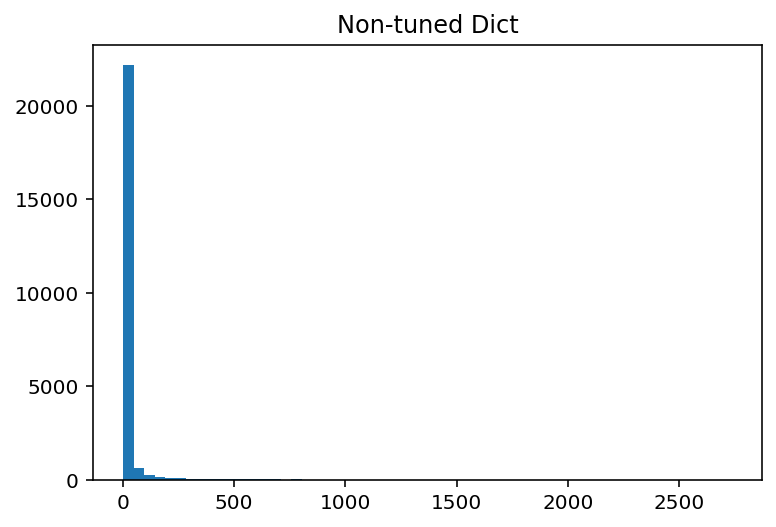


The tuned dictionary contains 1000 terms
First terms in the dictionary:
0 : 15
1 : add
2 : average
3 : away
4 : best
5 : cafe
6 : called
7 : chicken
8 : cup
9 : customer


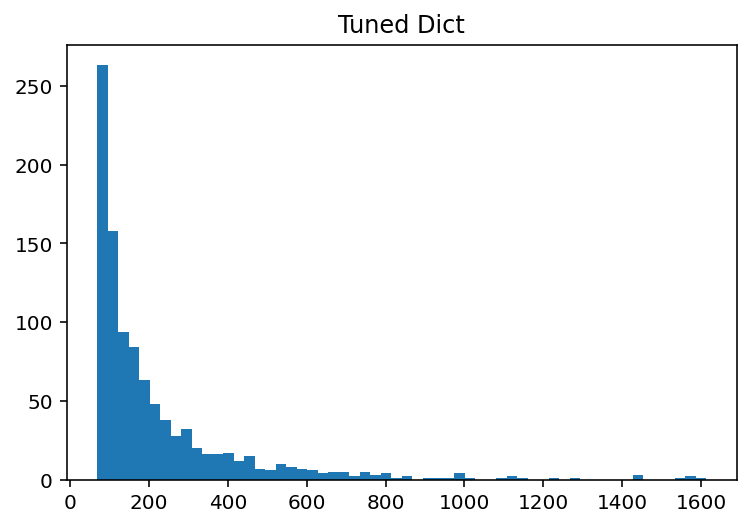

In [8]:
import gensim

#<SOL>
# Create dictionary of tokens: the input is the preprocessed corpus 
D = gensim.corpora.Dictionary(corpus_reviews)
n_tokens = len(D)

print(colored('The dictionary contains '+str(n_tokens)+' terms', attrs=['bold']))
print('First terms in the dictionary:')
for n in range(10):
    print(str(n), ':', D[n])

plt.hist(D.dfs.values(),58)
plt.title('Non-tuned Dict')
plt.show()
    
# Dictionary Tuning
no_below = 5 #Minimum number of documents to keep a term in the dictionary
no_above = .75 #Maximum proportion of documents in which a term can appear to be kept in the dictionary

D.filter_extremes(no_below=no_below,no_above=no_above, keep_n=1000)
n_tokens = len(D)

print(colored('\nThe tuned dictionary contains '+str(n_tokens)+' terms', attrs=['bold']))
print('First terms in the dictionary:')
for n in range(10):
    print(str(n), ':', D[n])

plt.hist(D.dfs.values(),58)
plt.title('Tuned Dict')
plt.show()

# TODO: Justificación
#</SOL>

## 2.2 Representación BoW
Obtenga la representación BoW de las reviews preprocesadas.

Original document (before cleaning):
Coconut's Fish Cafe is a fantastic, Five Stars fish cafe.

The five of us drove here on our lunch hour and lucky us, there were only a few customers in line. Nice!  A good sign, when UR working against a clock. 

I ordered the Póke (Photo) for $11.99 which was outstanding.  I love fresh Tuna and Coconut's might be some of the best I've every had.  Order it and see!

My coworkers ordered, the Chicken Tacos for $11.99, Steak Tacos (Photos) for $11.49, Fish Taco for $10.99 and a cup of Chowder for $5.74. Add in a few IPAs, or soft drinks and we all averaged about $15 each.

I tried my friend Josh's Fish Tacos and his was great, too.  So why they Four Star review, Georgie? Well the non fish group thought theirs was average. Okay, so you go to a place called Coconut's Fish Cafe and you order chicken and steak?  I'm sorry, that is so LOL. 

Step away from the meat taco guys and no one will get hurt!  Order the Poke, Fish or Shrimp Tacos and you'll fall in

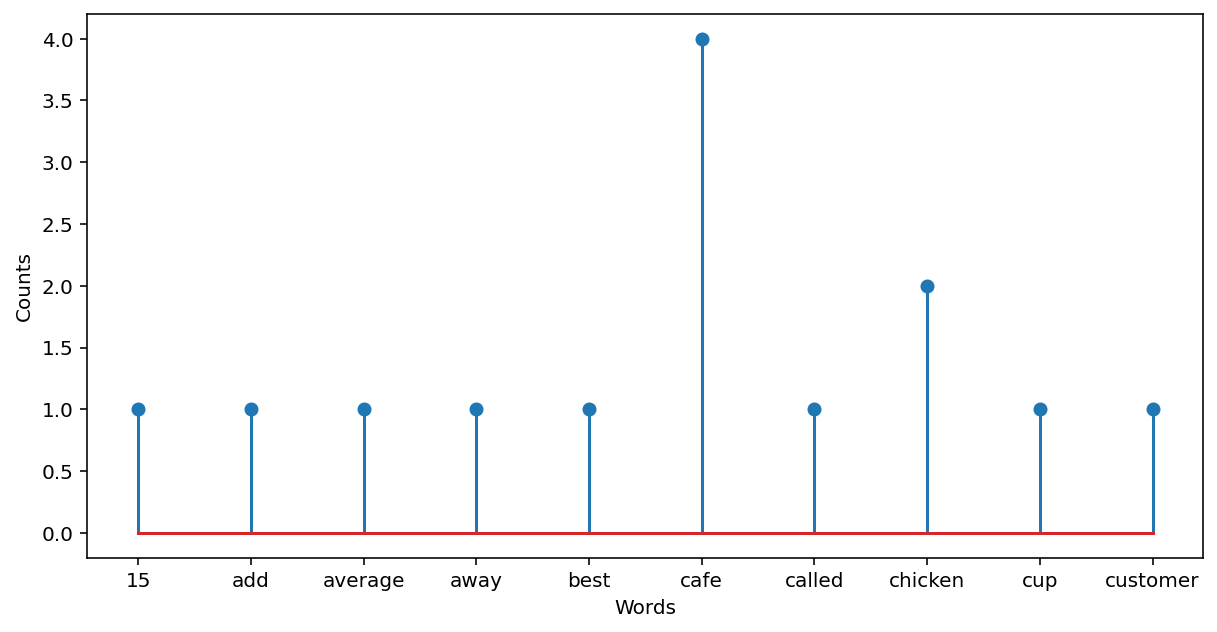

In [9]:
#<SOL>
corpus_bow = [D.doc2bow(doc) for doc in corpus_reviews]

n_doc=0
print(colored('Original document (before cleaning):',attrs=['bold']))
print(reviews[n_doc])
print(colored('\nOriginal document (after cleaning):',attrs=['bold']))
print(corpus_reviews[n_doc])
print(colored('\nSparse vector representation (first 10 components):',attrs=['bold']))
print(corpus_bow[n_doc][:10])
print(colored('\nWord counts for the document (first 10 components):',attrs=['bold']))
list_word_counts = [(D[doc_bow[0]], doc_bow[1]) for doc_bow in corpus_bow[n_doc][:10]]
print(list_word_counts)

(words, counts) = zip(*list_word_counts)
plt.figure(figsize=(10,5))
plt.stem(words,counts, use_line_collection = True)
plt.xlabel('Words')
plt.ylabel('Counts')
plt.show()
#</SOL>

## 2.3 Representación TF-IDF
Obtenga la representación TF-IDF de las reviews preprocesadas.

Original document (before cleaning):
Coconut's Fish Cafe is a fantastic, Five Stars fish cafe.

The five of us drove here on our lunch hour and lucky us, there were only a few customers in line. Nice!  A good sign, when UR working against a clock. 

I ordered the Póke (Photo) for $11.99 which was outstanding.  I love fresh Tuna and Coconut's might be some of the best I've every had.  Order it and see!

My coworkers ordered, the Chicken Tacos for $11.99, Steak Tacos (Photos) for $11.49, Fish Taco for $10.99 and a cup of Chowder for $5.74. Add in a few IPAs, or soft drinks and we all averaged about $15 each.

I tried my friend Josh's Fish Tacos and his was great, too.  So why they Four Star review, Georgie? Well the non fish group thought theirs was average. Okay, so you go to a place called Coconut's Fish Cafe and you order chicken and steak?  I'm sorry, that is so LOL. 

Step away from the meat taco guys and no one will get hurt!  Order the Poke, Fish or Shrimp Tacos and you'll fall in

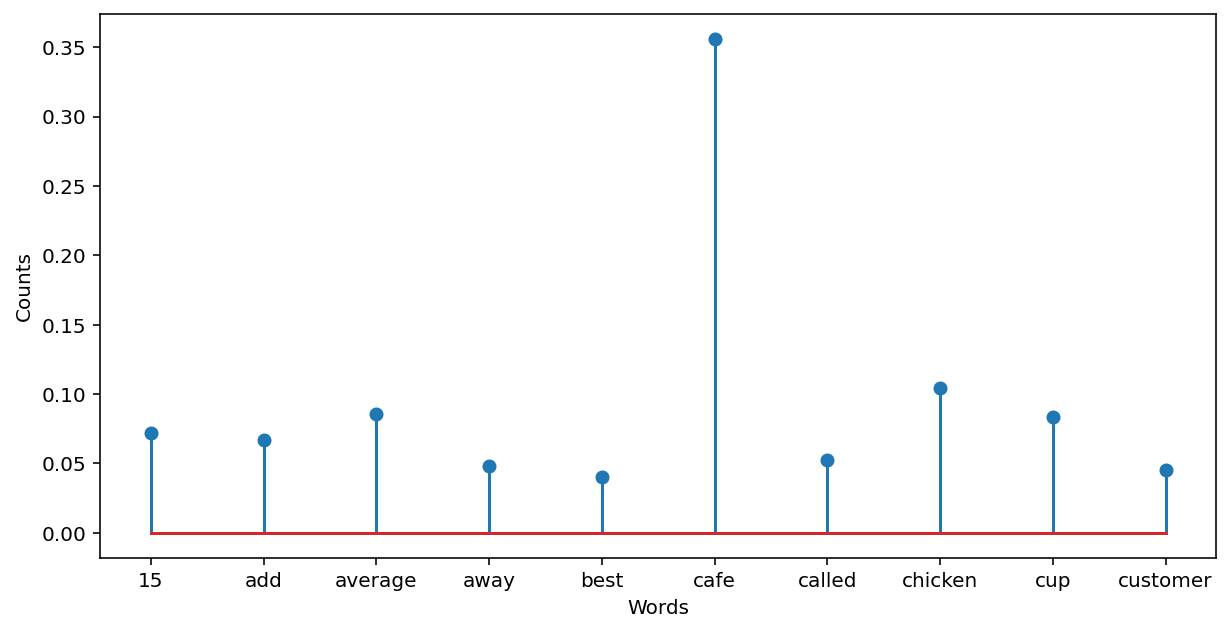

In [10]:
#<SOL>
from gensim.models import TfidfModel

# fit TFIDF model for all the corpus
model = TfidfModel(corpus_bow)

# apply model to all corpus document
corpus_tfidf = model[corpus_bow]  

n_doc=0
print(colored('Original document (before cleaning):',attrs=['bold']))
print(reviews[n_doc])
print(colored('\nOriginal document (after cleaning):',attrs=['bold']))
print(corpus_reviews[n_doc])
print(colored('\nSparse TFIDF vector representation (first 10 components):',attrs=['bold']))
print(corpus_tfidf[n_doc][:10])
print(colored('\nWord counts for the document (first 10 components):',attrs=['bold']))
list_word_counts = [(D[doc_bow[0]], doc_bow[1]) for doc_bow in corpus_bow[n_doc][:10]]
print(list_word_counts)
print(colored('\nTF-IDF for the document (first 10 components):',attrs=['bold']))
list_tfidf = [(D[doc_tfidf[0]], doc_tfidf[1]) for doc_tfidf in corpus_tfidf[n_doc][:10]]
print(list_tfidf)

#Plot Tf-IDF
(words, counts) = zip(*list_tfidf)
plt.figure(figsize=(10,5))
plt.stem(words,counts, use_line_collection = True)
plt.xlabel('Words')
plt.ylabel('Counts')
plt.show()
#</SOL>

## 2.4 Conversión a matrices sparse

Use la función `corpus2csc` para convertir las representaciones BoW y TF-IDF a matrices sparse con las que poder trabajar en las siguientes secciones.

In [11]:
from gensim.matutils import corpus2csc
#<SOL>
n_tokens = len(D)
num_docs = len(corpus_bow)
# Convert BoW representacion
corpus_bow_sparse = corpus2csc(corpus_bow, num_terms=n_tokens, num_docs=num_docs).T
# Convert TFIDF representacion
corpus_tfidf_sparse = corpus2csc(corpus_tfidf, num_terms=n_tokens, num_docs=num_docs).T

print(colored('BoW Sparse Representation:',attrs=['bold']))
print(corpus_bow_sparse[1,:])
print(colored('\nTF-IDF Sparse Representation:',attrs=['bold']))
print(corpus_tfidf_sparse[1,:])
#</SOL>

BoW Sparse Representation:
  (0, 22)	3.0
  (0, 25)	1.0
  (0, 35)	1.0
  (0, 37)	2.0
  (0, 40)	2.0
  (0, 42)	1.0
  (0, 48)	2.0
  (0, 56)	1.0
  (0, 57)	1.0
  (0, 58)	1.0
  (0, 59)	1.0
  (0, 60)	2.0
  (0, 61)	1.0
  (0, 62)	1.0
  (0, 63)	1.0
  (0, 64)	1.0
  (0, 65)	1.0
  (0, 66)	2.0
  (0, 67)	3.0
  (0, 68)	1.0
  (0, 69)	1.0
  (0, 70)	1.0
  (0, 71)	1.0
  (0, 72)	1.0
  (0, 73)	1.0
  (0, 74)	1.0
  (0, 75)	1.0
  (0, 76)	1.0
  (0, 77)	1.0
  (0, 78)	1.0
  (0, 79)	2.0
  (0, 80)	1.0
  (0, 81)	1.0
  (0, 82)	1.0
  (0, 83)	1.0
  (0, 84)	1.0
  (0, 85)	1.0
  (0, 86)	1.0
  (0, 87)	1.0
  (0, 88)	1.0

TF-IDF Sparse Representation:
  (0, 22)	0.163362266668558
  (0, 25)	0.08975260291480786
  (0, 35)	0.03826264424010134
  (0, 37)	0.1803981255255014
  (0, 40)	0.0847558948387238
  (0, 42)	0.07643083564671885
  (0, 48)	0.29489021904881335
  (0, 56)	0.18445830868768343
  (0, 57)	0.10346083598082909
  (0, 58)	0.17778464975363092
  (0, 59)	0.13444416020272862
  (0, 60)	0.19744939181417512
  (0, 61)	0.16410605060845

# Ejercicio 3. Modelos de predicción con BoW y TFIDF  (2 ptos)

Utilice las representaciones vectoriales obtenidas anteriormente para predecir la puntuación asociada a cada review. Para esta predicción utilice y compare un regresor tipo k-NN (con la distancia coseno) y un modelo *Ridge Regression* lineal.

Para el entrenamiento y evalaución de estos modelos considere:
* 40% de los datos para entrenar y 60% para testear
* Aplique un proceso de CV con 5 fold para validar adecuadamente los parámetros libres de cada modelo
* Evalúe las prestaciones finales en términos de R2.

Además, no se olvide de normalizar los datos 
si lo considera necesario, en cuyo caso justifique la normalización aplicada.

Por último, compare y comente los resultados obtenidos. ¿Qué representación de los datos da mejores resultados? ¿Qué regresor funciona mejor? ¿A qué se cree que puede deberse?

In [17]:
#<SOL>
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from scipy import sparse

def normalize_sparse_vector(s):
  norm_s = np.array(np.sqrt(s.multiply(s).sum(1)))
  pos_zero = np.where(np.sqrt(s.multiply(s).sum(1))==0)[0]
  norm_s[pos_zero] = 1
  return s.multiply(sparse.csr_matrix(1/norm_s))

# Functions
def model_pipe_report(X_train, Y_train, X_test, Y_test, model='knn'):
    if model == 'knn':
        knn = KNeighborsRegressor(n_neighbors=2, weights='uniform', metric='cosine')
        pipe = Pipeline(steps=[('knn', knn)])
        param_grid = {'knn__n_neighbors': np.arange(1,50),
                      'knn__weights': ['uniform']}
        grid_pipe = GridSearchCV(pipe, param_grid, cv=5)
    else:
        rdg = Ridge(alpha=1.0)
        pipe = Pipeline(steps=[('rdg', rdg)])
        param_grid = {'rdg__alpha': np.logspace(-4,0,5),
                     }    
        grid_pipe = GridSearchCV(pipe, param_grid, cv=5)
    # Fit
    grid_pipe.fit(X_train, Y_train)
    # Stdout
    print("Best Model: ", grid_pipe.best_params_,'\n','_'*40)
    print("R2 Score with the training data {0:.4f}".format(grid_pipe.score(X_train, Y_train)))
    print("R2 Score with the test data {0:.4f}".format(grid_pipe.score(X_test,Y_test)),'\n','_'*40)

# Transform data to dense. Nota: NO HARÍA FALTA SKLEARN acepta SPARSE
#corpus_bow_array = corpus_bow_sparse.toarray()
#corpus_tfidf_array = corpus_tfidf_sparse.toarray()

# Split into a training and testing set
X_train_bow, X_test_bow, Y_train_bow, Y_test_bow = train_test_split(corpus_bow_sparse, y, test_size=0.6, random_state=1234)
X_train_tfidf, X_test_tfidf, Y_train_tfidf, Y_test_tfidf = train_test_split(corpus_tfidf_sparse, y, test_size=0.6, random_state=1234)

emb_dict = {'bow':[X_train_bow,Y_train_bow,X_test_bow,Y_test_bow],'tdifd':[X_train_tfidf,Y_train_tfidf,X_test_tfidf,Y_test_tfidf]}
for m in ['knn','rdg']:
    for k,v in emb_dict.items():
        print(colored(m.upper()+" "+k.upper()+" "+"Model",attrs=['bold']))
        model_pipe_report(v[0], v[1], v[2], v[3], model=m)

# Split into a training and testing set NORM Version!
X_train_bow, X_test_bow, Y_train_bow, Y_test_bow = train_test_split(normalize_sparse_vector(corpus_bow_sparse), y, test_size=0.6, random_state=1234)
X_train_tfidf, X_test_tfidf, Y_train_tfidf, Y_test_tfidf = train_test_split(normalize_sparse_vector(corpus_tfidf_sparse), y, test_size=0.6, random_state=1234)

emb_dict = {'bow':[X_train_bow,Y_train_bow,X_test_bow,Y_test_bow],'tdifd':[X_train_tfidf,Y_train_tfidf,X_test_tfidf,Y_test_tfidf]}
for m in ['knn','rdg']:
    for k,v in emb_dict.items():
        print(colored('NORMALIZED','red',attrs=['bold']),colored(m.upper()+" "+k.upper()+" "+"Model",attrs=['bold']))
        model_pipe_report(v[0], v[1], v[2], v[3], model=m)
        
        
# TODO: JUSTIFICAR:KNN mete ruido no lineal; RDG modelo lineal --> pesos > a palabras representativas
# TODO: Normalizar función notebook NLP si aplica RIDGE!!!
#</SOL>

KNN BOW Model
Best Model:  {'knn__n_neighbors': 29, 'knn__weights': 'uniform'} 
 ________________________________________
R2 Score with the training data 0.4651
R2 Score with the test data 0.4500 
 ________________________________________
KNN TDIFD Model
Best Model:  {'knn__n_neighbors': 33, 'knn__weights': 'uniform'} 
 ________________________________________
R2 Score with the training data 0.4715
R2 Score with the test data 0.4591 
 ________________________________________
RDG BOW Model
Best Model:  {'rdg__alpha': 1.0} 
 ________________________________________
R2 Score with the training data 0.8644
R2 Score with the test data -0.6856 
 ________________________________________
RDG TDIFD Model
Best Model:  {'rdg__alpha': 1.0} 
 ________________________________________
R2 Score with the training data 0.8073
R2 Score with the test data 0.6074 
 ________________________________________
NORMALIZED KNN BOW Model
Best Model:  {'knn__n_neighbors': 29, 'knn__weights': 'uniform'} 
 ___________

- La normalización no afecta a los algoritmos que utilizan el TF-IDF, ya que esta codificación ya está normalizada
- La normalización tampoco afecta a la codificación BoW en el algoritmo KNN puesto que se ha especificado una métrica del coseno y por lo tanto da igual la longitud del vector
- Por lo tanto, solo vemos mejoras en la normalización cuando se utiliza BoW con Ridge Model. Modelo lineal que asigna mayores pesos a palabras más representativas

# Ejercicio 4. *Embeddings* (2 ptos)

En este ejercicio vamos a utilizar algunos de los *embeddings* que hemos visto para reducir la dimensión de las representaciones vectoriales obtenidas anteriomente. En concreto, vamos a usar dos tipos de *embeddings* en esta sección:
* *Principal Compmente Analysis* (PCA)
* El basado en K-means

Para simplicar este análisis, a partir de ahora solo vamos a trabajar con la representación TF-IDF. Así que obtenga para los vectores TF-IDF el *embedding* PCA asociado y utilicelo para ver las prestaciones que nos daría el modelo de *ridge regression* lineal. Obtenga estas prestaciones para un *embedding* de tamaño $2, 10, 25, 50 y 100$ y analice como influye el tamaño del *embedding* en las prestaciones del regresor.

Por último, para el *embedding* de dimensión 2 haga una representación del mismo, donde cada *review* será un punto en este espacio bidimensional y asígnele diferentes colores según las puntuaciones que tenga asociadas (por ejemplo, las *reviews* con puntuación 1 las visualizamos en rojo, las *reviews* con puntuación 2 las visualizamos en azul, ...). 

Finalmente, analice los resultados obtenidos.


## 4.1 *Embeddings* con PCA

El método PCA de sklearn no trabaja con matrices sparse, así que para poder aplicar esta transformación de los datos, tendrá que comenzar transformando la representación sparse TF-IDF a una representación densa (para ello puede usar el método `.toarray()` de las matrices sparse).

In [23]:
#<SOL>
from sklearn.decomposition import PCA

# Transform data to dense
corpus_bow_array = corpus_bow_sparse.toarray()
corpus_tfidf_array = corpus_tfidf_sparse.toarray()

# Split into a training and testing set
X_train_bow, X_test_bow, Y_train_bow, Y_test_bow = train_test_split(corpus_bow_array, y, test_size=0.6, random_state=1234)
X_train_tfidf, X_test_tfidf, Y_train_tfidf, Y_test_tfidf = train_test_split(corpus_tfidf_array, y, test_size=0.6, random_state=1234)


rdg = Ridge(alpha=1.0)
pipe = Pipeline(steps=[('PCA', PCA()),('rdg', rdg)])
param_grid = {'PCA__n_components': [2,10,25,50,100],
              'rdg__alpha': np.logspace(-4,0,5),
             }    
grid_pipe = GridSearchCV(pipe, param_grid, cv=5)
# Fit
grid_pipe.fit(X_train_tfidf, Y_train_tfidf)
# Stdout
print("Best Model: ", grid_pipe.best_params_,'\n','_'*40)
print("R2 Score with the training data {0:.4f}".format(grid_pipe.score(X_train_tfidf, Y_train_tfidf)))
print("R2 Score with the test data {0:.4f}".format(grid_pipe.score(X_test_tfidf,Y_test_tfidf)),'\n','_'*40)
score = pd.DataFrame(grid_pipe.cv_results_)[['params','mean_test_score','rank_test_score']].sort_values(by='rank_test_score')
score.rename(columns={'mean_test_score':'mean_cv_test_score','rank_test_score':'rank_cv_test_score'},inplace=True)
display(score)

print('Viendo los resultados de la validación cruzada, el mejor resultado del regresor se da con una dimensionalidad alta y un alpha bajo')
#</SOL>

Best Model:  {'PCA__n_components': 100, 'rdg__alpha': 0.0001} 
 ________________________________________
R2 Score with the training data 0.6277
R2 Score with the test data 0.5875 
 ________________________________________


params  mean_cv_test_score  \
20  {'PCA__n_components': 100, 'rdg__alpha': 0.0001}            0.558431   
22    {'PCA__n_components': 100, 'rdg__alpha': 0.01}            0.553540   
21   {'PCA__n_components': 100, 'rdg__alpha': 0.001}            0.550292   
15   {'PCA__n_components': 50, 'rdg__alpha': 0.0001}            0.549983   
23     {'PCA__n_components': 100, 'rdg__alpha': 0.1}            0.548806   
16    {'PCA__n_components': 50, 'rdg__alpha': 0.001}            0.548487   
17     {'PCA__n_components': 50, 'rdg__alpha': 0.01}            0.547271   
18      {'PCA__n_components': 50, 'rdg__alpha': 0.1}            0.545255   
24     {'PCA__n_components': 100, 'rdg__alpha': 1.0}            0.543593   
19      {'PCA__n_components': 50, 'rdg__alpha': 1.0}            0.530219   
13      {'PCA__n_components': 25, 'rdg__alpha': 0.1}            0.507552   
10   {'PCA__n_components': 25, 'rdg__alpha': 0.0001}            0.497526   
11    {'PCA__n_components': 25, 'rdg__alpha': 0.001}            0.497115   
12     {'PCA__n_components': 25, 'rdg__alpha': 0.01}            0.494666   
14      {'PCA__n_components': 25, 'rdg__alpha': 1.0}            0.492901   
7      {'PCA__n_components': 10, 'rdg__alpha': 0.01}            0.385703   
5    {'PCA__n_components': 10, 'rdg__alpha': 0.0001}            0.383070   
6     {'PCA__n_components': 10, 'rdg__alpha': 0.001}            0.381903   
8       {'PCA__n_components': 10, 'rdg__alpha': 0.1}            0.379940   
9       {'PCA__n_components': 10, 'rdg__alpha': 1.0}            0.378504   
1      {'PCA__n_components': 2, 'rdg__alpha': 0.001}            0.266975   
0     {'PCA__n_components': 2, 'rdg__alpha': 0.0001}            0.266623   
2       {'PCA__n_components': 2, 'rdg__alpha': 0.01}            0.266527   
3        {'PCA__n_components': 2, 'rdg__alpha': 0.1}            0.266476   
4        {'PCA__n_components': 2, 'rdg__alpha': 1.0}            0.264365   

    rank_cv_test_score  
20                   1  
22                   2  
21                   3  
15                   4  
23                   5  
16                   6  
17                   7  
18                   8  
24                   9  
19                  10  
13                  11  
10                  12  
11                  13  
12                  14  
14                  15  
7                   16  
5                   17  
6                   18  
8                   19  
9                   20  
1                   21  
0                   22  
2                   23  
3                   24  
4                   25

Viendo los resultados de la validación cruzada, el mejor resultado del regresor se da con una dimensionalidad alta y un alpha bajo


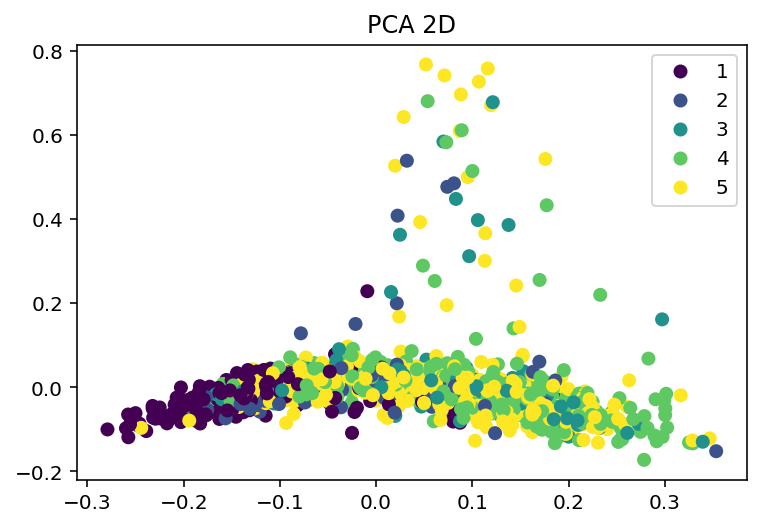

In [46]:
# PCA
pca = PCA(n_components=2)
result = pca.fit_transform(X_train_tfidf)

# Create the scatter plot
scatter = plt.scatter(result[:,0],result[:,1], c = Y_train_tfidf)
labels = np.unique(Y_train_tfidf)
handles = [plt.Line2D([],[],marker="o", ls="", 
                      color=scatter.cmap(scatter.norm(yi))) for yi in labels]
plt.legend(handles, labels)
plt.title('PCA 2D');

## 4.2 *Embeddings* con K-means

El método K-means sí admite la representación *sparse* de los datos, así que no hace falta que en este caso convierta sus datos a formato denso.

In [44]:
#<SOL>
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances

param_grid = {
              'rdg__alpha': [1],
             }  
pipe = Pipeline(steps=[('rdg', rdg)])
for K in [2,10,25,50,100]:
    # train K-means for embedding computation
    kmeans = KMeans(n_clusters=K) # Definimos objeto con parámetros por defecto
    kmeans.fit(X_train_tfidf) # Entrenamos k-means
    # Get centers
    centers = kmeans.cluster_centers_

    # Embeddings are distances to centers
    X_kmeans_train = pairwise_distances(X_train_tfidf, centers)
    X_kmeans_test = pairwise_distances(X_test_tfidf, centers)

    # CV with GridSearchCV (WITHOUT USING PCA!)
    grid_pipe = GridSearchCV(pipe, param_grid, cv=5)
    grid_pipe.fit(X_kmeans_train, Y_train_tfidf)

    # Test
    R2_train_rdg = grid_pipe.score(X_kmeans_train,Y_train_tfidf)
    R2_test_rdg = grid_pipe.score(X_kmeans_test,Y_test_tfidf)

    print(colored("El número de componentes del embedding es {0:d}".format(K),attrs=['bold']))
    print("R2 train: {0:.2f}. R2 test: {1:.2f}\n".format(R2_train_rdg, R2_test_rdg))
#</SOL>

El número de componentes del embedding es 2
R2 train: 0.15. R2 test: 0.15

El número de componentes del embedding es 10
R2 train: 0.27. R2 test: 0.28

El número de componentes del embedding es 25
R2 train: 0.34. R2 test: 0.35

El número de componentes del embedding es 50
R2 train: 0.40. R2 test: 0.40

El número de componentes del embedding es 100
R2 train: 0.48. R2 test: 0.46



# Ejercicio 5. *Embeddings* con *Word2Vec* (2 ptos)

En esta última sección vamos a obtener la representación *Word2Vec* para obtener un *embedding* de las palabras de nuestro corpus de *reviews* y luego utilizaremos esta representación para predecir la puntuación de cada *review*.

Para ello, vaya resolviendo los siguientes apartados:

## 5.1 *Word2Vec* de las palabras del corpus de *reviews*

Comience entrenando una red neuronal del tipo word2vec para obtener una *embedding* de tamaño 200 con un tamaño de ventana de 5 y eliminado las palabras que aparecen en menos de 20 documentos.

Extraiga del modelo el *embedding* aprendido y use el algoritmo t-SNE para representar este  *embedding* en dos dimensiones.

Word2Vec(vocab=3179, size=200, alpha=0.025)


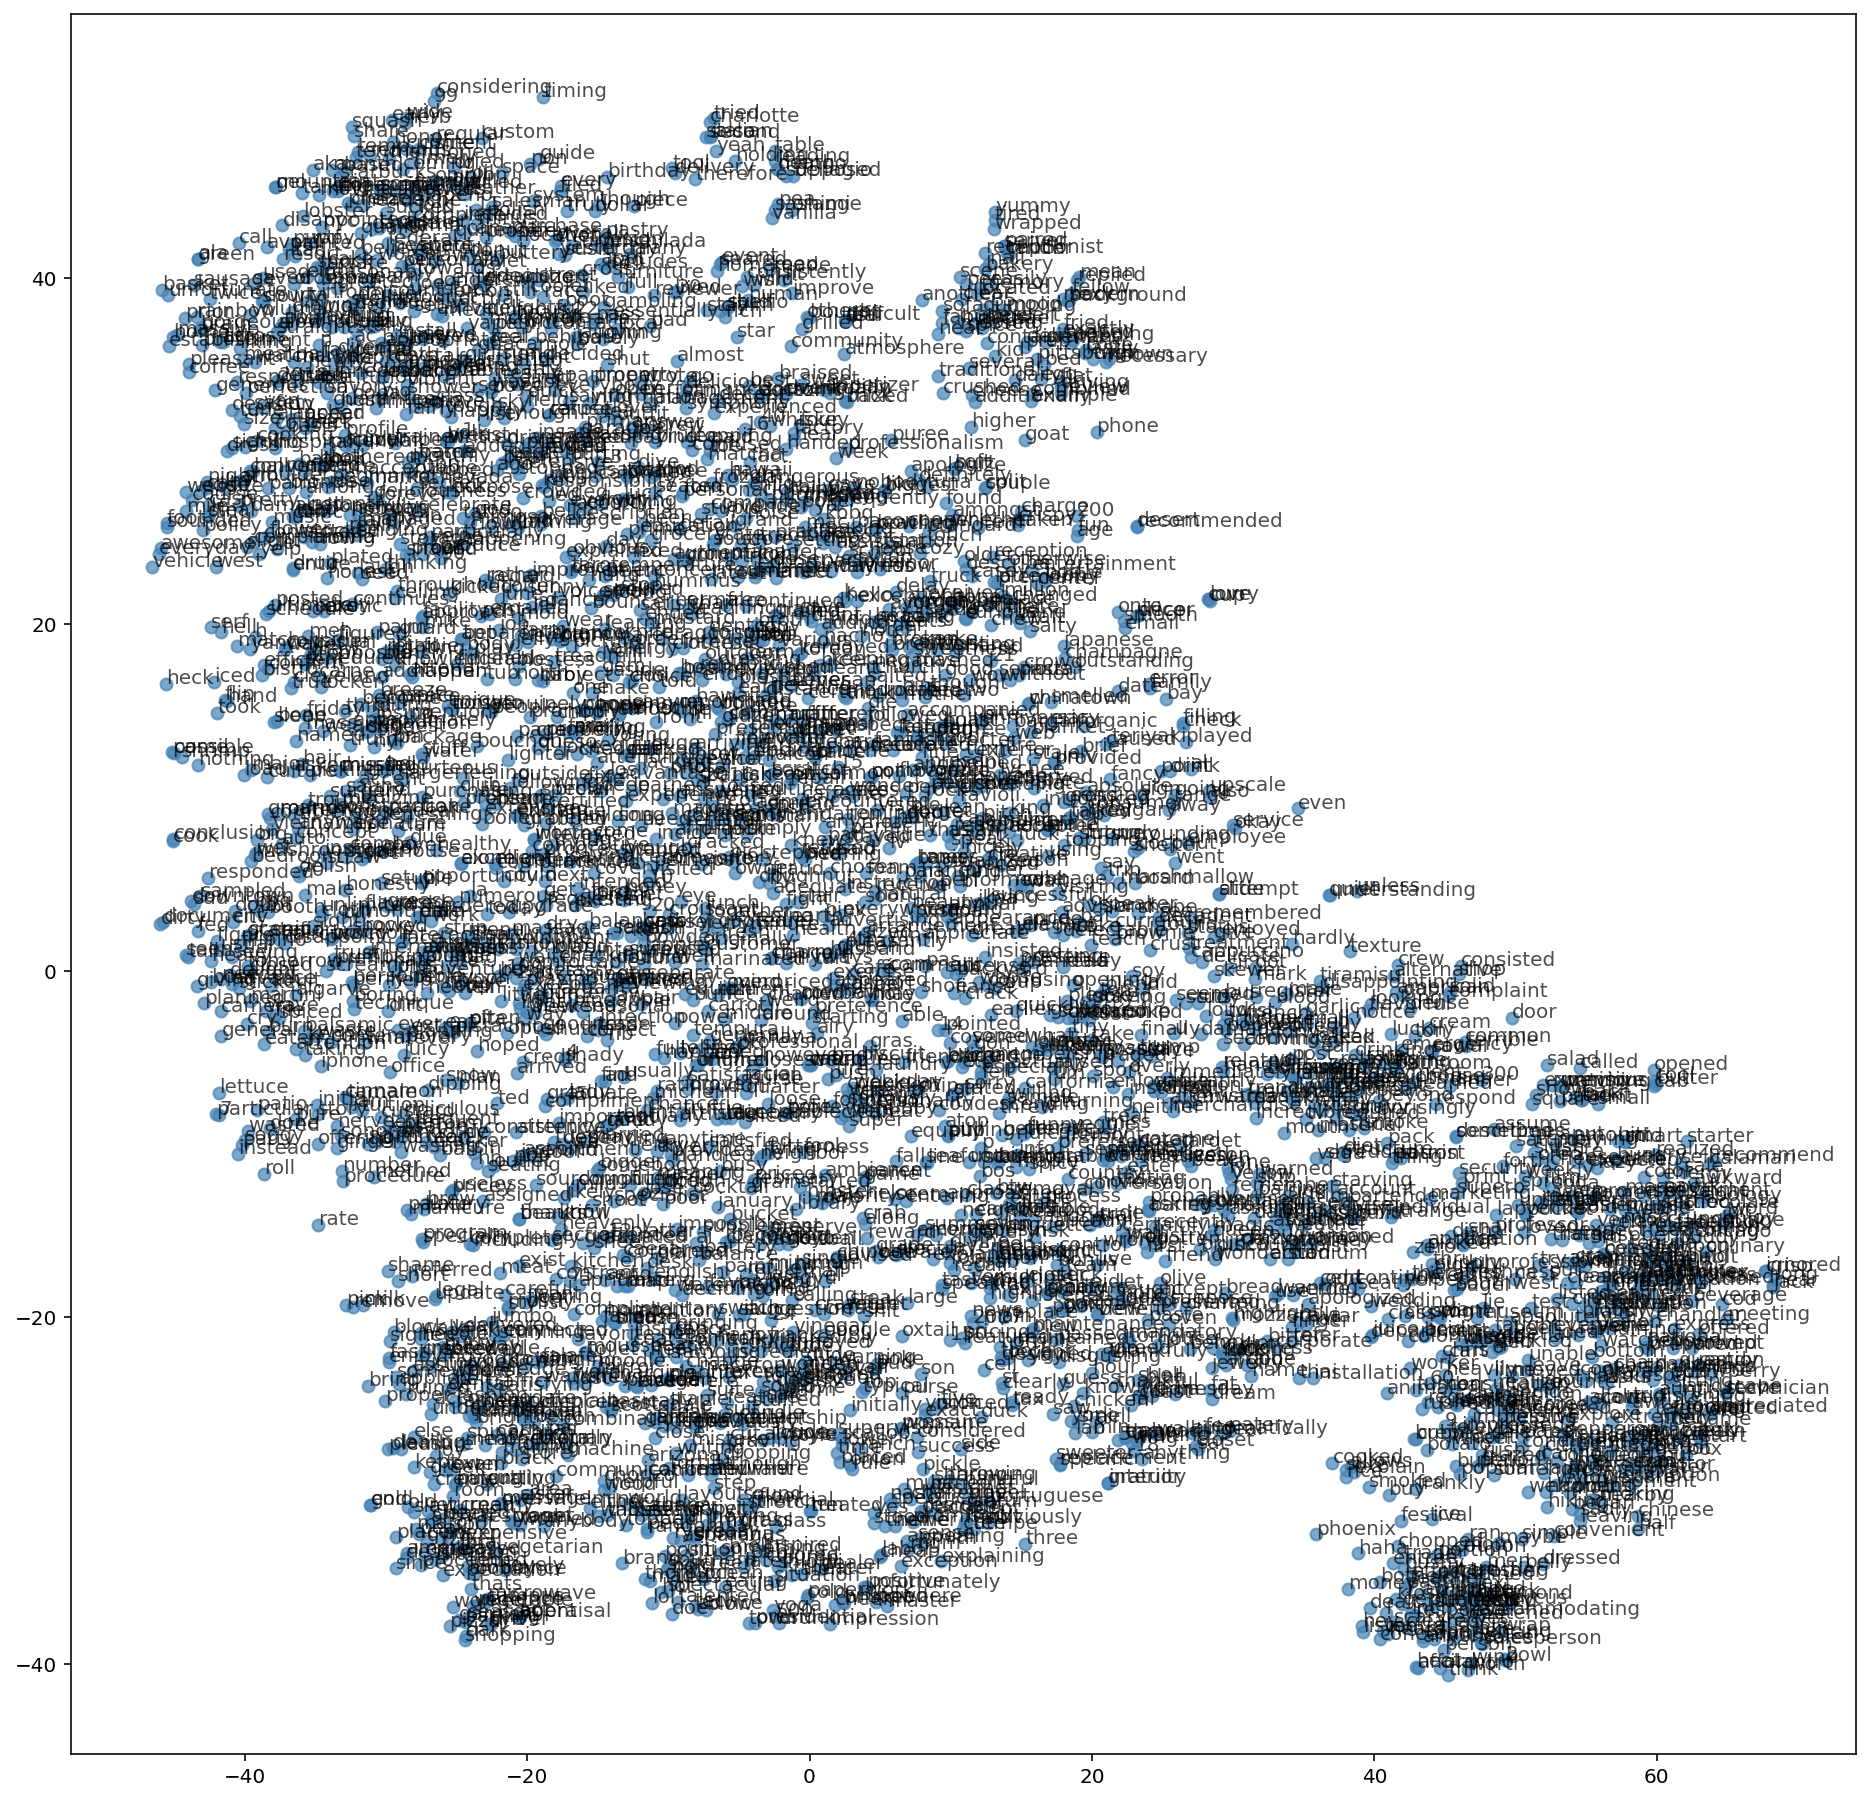

In [53]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
#<SOL>
model = Word2Vec(corpus_reviews, sg=1, size = 200, window=5, min_count=20)
print(model)

# Create numpy array with all word2vec
embeddings = model.wv.vectors 
#embeddings = np.array([model.wv[w] for w in list(model.wv.vocab)])
embeddings[0,:]
tsne = TSNE()
embed_tsne = tsne.fit_transform(embeddings)

fig, ax = plt.subplots(figsize=(16, 16))
for idx, word in enumerate((model.wv.vocab)):
    plt.scatter(*embed_tsne[idx, :], color='steelblue', alpha=0.7)
    plt.annotate(word, (embed_tsne[idx, 0], embed_tsne[idx, 1]), alpha=0.7)
#</SOL>

## 5.2 Análisis del  *Word2Vec* 

Utilice el método `.most_similar` del word2vec que acaba de entrenar para encontrar las palabras más similares a los términos `breakfast`, `great` y  `wrong`. ¿Cree que el modelo ha sido capaz de aprender la semantica del cospus?

In [54]:
#<SOL>
word_list = ['breakfast','great','wrong','waiter','cozy','trendy']
for i in word_list:
    print(colored('TOP 5 Most Similar Words for ',attrs=['bold']),colored(i,'green',attrs=['bold']))
    print(model.wv.most_similar(i)[0:5])
    print(colored(i,'green',attrs=['bold']),'vs',colored(model.wv.most_similar(i)[0][0],'blue',attrs=['bold']))
#</SOL>

TOP 5 Most Similar Words for  breakfast
[('lunch', 0.8728888034820557), ('brunch', 0.8518650531768799), ('ayce', 0.8326646089553833), ('hawaiian', 0.828618049621582), ('hh', 0.8250323534011841)]
breakfast vs lunch
TOP 5 Most Similar Words for  great
[('awesome', 0.780015766620636), ('excellent', 0.7329766750335693), ('fantastic', 0.7320492267608643), ('wonderful', 0.7228847742080688), ('superb', 0.7175999879837036)]
great vs awesome
TOP 5 Most Similar Words for  wrong
[('bos', 0.8426172137260437), ('nasty', 0.8393961191177368), ('necessary', 0.8345332145690918), ('complain', 0.8309944272041321), ('truth', 0.8265203237533569)]
wrong vs bos
TOP 5 Most Similar Words for  waiter
[('waitress', 0.9192777872085571), ('server', 0.9168239831924438), ('hostess', 0.896393895149231), ('promptly', 0.8336547613143921), ('shortly', 0.8290534019470215)]
waiter vs waitress
TOP 5 Most Similar Words for  cozy
[('chic', 0.958742082118988), ('outdoor', 0.9436706900596619), ('indoor', 0.9433773756027222), (

__El Modelo funciona bien y es capaz de sacar sinónimos con sentido__

## 5.3 Representación de las *reviews* a partir del *Word2Vec* 

En esta sección vamos a representar cada documento con el `word2vec` promedio de las palabras de cada *review*. Para facilitarte este cálculo las siguientes celdas de código generan una lista con el vocabulario de las *reviews* y otra lista con el vocabulario del *embedding*. A partir de ellas:
1. Construya una matriz con los embeddings para las palabras del vocabulario de las *reviews*. Llame a esta matriz `embeddings_vocab`
2. Genere un *embedding* por *review* como el producto escalar del BoW de esa review y `embeddings_vocab`. De este modo estará calculando un promedio ponderado de los *embeddings* para las palabras en esa review.
3. Normalice el *embedding* de cada documento a norma 1 para compensar el efecto de los docuemntos más largos frente a los docuemntos con menos palabras. Para ello puede usar la función `normalize_dense_vector` que le damos a continuación.

Si lo desea, con ayuda del t-SNE, puede representar estos embeddings en un espacio bidimensional.


In [55]:
def normalize_dense_vector(s):
    norm1 = np.linalg.norm(s, axis =1)
    norm1[norm1==0] =1
    return (s.T/norm1).T

In [56]:
# Vocabulario de las reviews
vocab_reviews = list(D.values()) 
print(len(vocab_reviews))
print(vocab_reviews)

1000
['15', 'add', 'average', 'away', 'best', 'cafe', 'called', 'chicken', 'cup', 'customer', 'drink', 'enjoy', 'every', 'fantastic', 'fish', 'five', 'four', 'fresh', 'friend', 'get', 'go', 'good', 'great', 'group', 'guy', 'hour', 'line', 'lol', 'love', 'lucky', 'lunch', 'meat', 'might', 'nice', 'okay', 'one', 'order', 'ordered', 'outstanding', 'photo', 'place', 'review', 'see', 'shrimp', 'sign', 'soft', 'sorry', 'star', 'steak', 'step', 'taco', 'thought', 'tried', 'u', 'well', 'working', '9', 'amazing', 'appreciate', 'arrived', 'business', 'chance', 'close', 'come', 'could', 'date', 'decor', 'dinner', 'dish', 'entire', 'food', 'la', 'meal', 'perfectly', 'potato', 'prepared', 'restaurant', 'rock', 'seated', 'show', 'soup', 'stopped', 'super', 'table', 'truly', 'vega', 'want', 'window', 'yummy', '10', '2', '20', '5', 'actually', 'almost', 'always', 'amount', 'authentic', 'bad', 'ca', 'came', 'cuisine', 'decent', 'enough', 'even', 'event', 'ever', 'finally', 'first', 'foot', 'got', 'help

In [57]:
# Vocabulario del embedding
vocab_emb = list(model.wv.vocab)
print(len(vocab_emb))
print(vocab_emb)

3179
['coconut', 'fish', 'cafe', 'fantastic', 'five', 'star', 'u', 'drove', 'lunch', 'hour', 'lucky', 'customer', 'line', 'nice', 'good', 'sign', 'working', 'ordered', 'photo', 'wa', 'outstanding', 'love', 'fresh', 'tuna', 'might', 'best', 'every', 'order', 'see', 'chicken', 'taco', 'steak', 'cup', 'add', 'soft', 'drink', '15', 'tried', 'friend', 'great', 'four', 'review', 'well', 'non', 'group', 'thought', 'average', 'okay', 'go', 'place', 'called', 'sorry', 'lol', 'step', 'away', 'meat', 'guy', 'one', 'get', 'hurt', 'poke', 'shrimp', 'fall', 'enjoy', 'stopped', 'prime', 'tonight', '9', 'business', 'meeting', 'arrived', 'seated', 'table', 'close', 'window', 'could', 'bellagio', 'fountain', 'show', 'background', 'whiskey', 'chance', 'truly', 'appreciate', 'beauty', 'restaurant', 'decor', 'upscale', 'power', 'dinner', 'date', 'squash', 'soup', 'potato', 'banana', 'tart', 'desert', 'entire', 'meal', 'amazing', 'dish', 'perfectly', 'prepared', 'super', 'yummy', 'want', 'la', 'vega', 'come

In [65]:
#<SOL>
embeddings_vocab = np.array([model.wv[word] for word in vocab_reviews])
#</SOL>

In [69]:
embeddings_vocab.shape

(1000, 200)

## 5.4 Estimación de los *ratings* a partir de la representación  *Word2Vec* 

Utilice la representación anterior de cada *review* para estimar su *rating* mediante un modelo *Ridge Regresion* lineal.

In [ ]:
#<SOL>

#</SOL>

# Ejercicio 6 (EXTRA). Utilización de modelos *Word2Vec* preentrenados 

Repita el ejercicio anterior, pero utilizando el *Word2Vec* preentrenado de Google News. La siguiente celda de código carga este modelo para su uso y extrae los *embeddings*. Tenga en cuenta que este modelo preentrenado no tiene porque incluir todas las palabras del vocabulario de las *reviews*, así que para las palabras que no estén, simplemente no las tenga en cuenta para generar el *embedding* promedio de la *review*.

In [ ]:
# Load Model from the API
# import gensim.downloader as api
# wv = api.load('word2vec-google-news-300')

# Load the model from a local file
from gensim.models import KeyedVectors
filename = '../../../../Downloads/GoogleNews-vectors-negative300.bin.gz'
wv = KeyedVectors.load_word2vec_format(filename, binary=True)

In [ ]:
# get embeddings
embeddings = wv.vectors 

# Vocabulario del embedding
vocab_emb = list(wv.vocab)
print(len(vocab_emb))
print(vocab_emb)

In [ ]:
#<SOL>

#</SOL>